In [22]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

data_path = r'./data'
data_file = os.path.join(data_path, 'train.csv')

df = pd.read_csv(data_file, encoding='utf-8')

In [42]:
levels = ['bad','ok','great']
table = pd.crosstab(df['community_vote'], df['critics_vote'])
ct = sm.stats.Table(table.loc[:, levels])
print(ct.table_orig)
print(ct.fittedvalues)
print(ct.resid_pearson)

critics_vote    bad    ok  great
community_vote                  
bad             176    51      0
great            30   263    336
ok              905  1130    292
critics_vote           bad           ok       great
community_vote                                     
bad              79.750980   103.622510   45.126510
great           220.056863   285.925569  124.517569
ok              812.692157  1055.951922  459.855922
critics_vote          bad        ok      great
community_vote                                
bad             10.833744 -5.120334  -6.643196
great          -12.778270 -1.326224  18.996979
ok               3.255530  2.294111  -7.804232


In [43]:
test_table = ct.test_nominal_association()
print(test_table.pvalue)
print(ct.chi2_contribs)

0.0
critics_vote           bad         ok       great
community_vote                                   
bad             117.370003  26.217817   44.132050
great           163.284179   1.758871  360.885229
ok               10.598473   5.262944   60.906043


In [31]:
print(ct.local_oddsratios)
print(ct.cumulative_oddsratios)

critics_vote       bad        ok  great
budget                                 
avg           0.873383  1.014844    NaN
high          2.638746  1.352446    NaN
low                NaN       NaN    NaN
critics_vote       bad        ok  great
budget                                 
avg           1.426572  1.383346    NaN
high          2.659749  1.901607    NaN
low                NaN       NaN    NaN


(<matplotlib.figure.Figure at 0x213b3b45ba8>,
 OrderedDict([(('great', 'great'),
               (0.0, 0.0, 0.19565575784722675, 0.53064361595721155)),
              (('great', 'bad'),
               (0.0,
                0.53395487423535715,
                0.19565575784722675,
                0.047378894281893874)),
              (('great', 'ok'),
               (0.0,
                0.58464502679539687,
                0.19565575784722675,
                0.41535497320460307)),
              (('ok', 'great'),
               (0.2006062528967317,
                0.0,
                0.7238329865031744,
                0.1246524388335036)),
              (('ok', 'bad'),
               (0.2006062528967317,
                0.12796369711164929,
                0.7238329865031744,
                0.3863371820010984)),
              (('ok', 'ok'),
               (0.2006062528967317,
                0.51761213739089351,
                0.7238329865031744,
                0.48238786260910643))

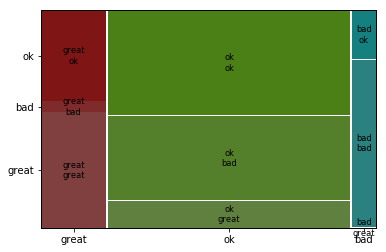

In [45]:
mosaic(df, index=['community_vote','critics_vote'])

In [47]:
# plot some barchart to investigate correlation
levels = ['low', 'avg', 'high']

for l in levels:
    print('level: %s\n' % l)
    subset = df[df['vote_count_binned'] == l]
    group = subset.groupby(['budget_binned', 'vote_average_binned'])
    size = group.size()
    total = size.sum()   
    cont_table = size.unstack()    
    expected_rows = cont_table.sum()
#     observed_major = cont_table['major']
    
    print("%s\n" % cont_table)
    print('total: %d' % total)
    print('cols marginal:')
    print(expected_rows)
    print('\n')

# x = [df[df['macro_genre'] == g]['major'] for g in genres]
# y = [df[df['macro_genre'] == g]['roi_binned'].value_counts() for g in genres]

# plt.bar(x[0],y[0], width=.2)

# # ax = plt.subplot(111)
# # ax.bar(x, y,width=0.2,color='b',align='center')
# # ax.bar(x, z,width=0.2,color='g',align='center')
# # ax.bar(x, k,width=0.2,color='r',align='center')
# # ax.xaxis_date()

# plt.show()

level: low

vote_average_binned  bad  great   ok
budget_binned                       
avg                   77     17  302
high                  17      1   25
low                   33     56  267

total: 795
cols marginal:
vote_average_binned
bad      127
great     74
ok       594
dtype: int64


level: avg

vote_average_binned  bad  great   ok
budget_binned                       
avg                   56    112  721
high                  24     12  291
low                   15    118  243

total: 1592
cols marginal:
vote_average_binned
bad        95
great     242
ok       1255
dtype: int64


level: high

vote_average_binned  bad  great     ok
budget_binned                         
avg                  NaN  143.0  162.0
high                 4.0  116.0  294.0
low                  1.0   54.0   22.0

total: 796
cols marginal:
vote_average_binned
bad        5.0
great    313.0
ok       478.0
dtype: float64




In [2]:
df['popularity_binned'] = pd.qcut(df['popularity'], q=[0, 0.25, 0.75, 1],labels=['0-25', '25-75', '75-100'])
df['budget'].describe()

count    3.185000e+03
mean     4.110685e+07
std      4.450201e+07
min      1.000000e+00
25%      1.100000e+07
50%      2.600000e+07
75%      5.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

(array([  3.05800000e+03,   1.13000000e+02,   7.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  3.70730000e-02,   8.75914962e+01,   1.75145919e+02,
          2.62700343e+02,   3.50254766e+02,   4.37809189e+02,
          5.25363612e+02,   6.12918035e+02,   7.00472459e+02,
          7.88026882e+02,   8.75581305e+02]),
 <a list of 10 Patch objects>)

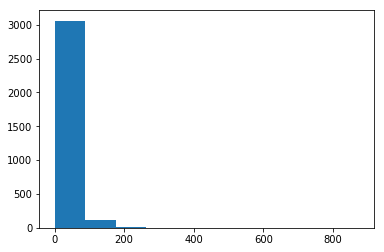

In [3]:
plt.hist(df['popularity'])

(array([  2.80900000e+03,   2.55000000e+02,   7.50000000e+01,
          3.40000000e+01,   6.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  5.00000000e+00,   2.78796513e+08,   5.57593021e+08,
          8.36389530e+08,   1.11518604e+09,   1.39398255e+09,
          1.67277905e+09,   1.95157556e+09,   2.23037207e+09,
          2.50916858e+09,   2.78796509e+09]),
 <a list of 10 Patch objects>)

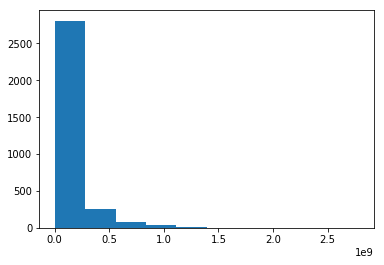

In [4]:
plt.hist(df['revenue'])

(array([  2.00000000e+03,   7.04000000e+02,   2.37000000e+02,
          1.41000000e+02,   5.40000000e+01,   3.10000000e+01,
          1.40000000e+01,   3.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   3.80000009e+07,   7.60000008e+07,
          1.14000001e+08,   1.52000001e+08,   1.90000000e+08,
          2.28000000e+08,   2.66000000e+08,   3.04000000e+08,
          3.42000000e+08,   3.80000000e+08]),
 <a list of 10 Patch objects>)

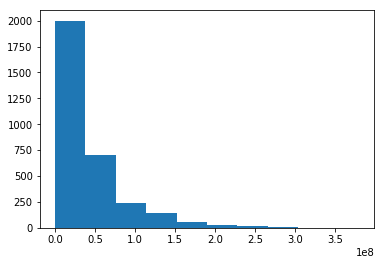

In [5]:
plt.hist(df['budget'])

(array([ 404.,  146.,  234.,  390.,  342.,  665.,  669.,  236.,   89.,   10.]),
 array([  0. ,   5.6,  11.2,  16.8,  22.4,  28. ,  33.6,  39.2,  44.8,
         50.4,  56. ]),
 <a list of 10 Patch objects>)

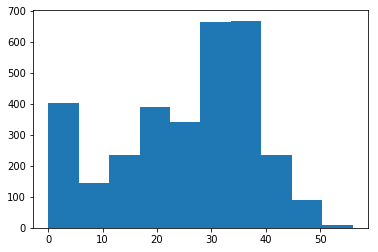

In [6]:
plt.hist(df['critics_count'])

(array([ 382.,   53.,  155.,  372.,  490.,  540.,  525.,  366.,  224.,   78.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

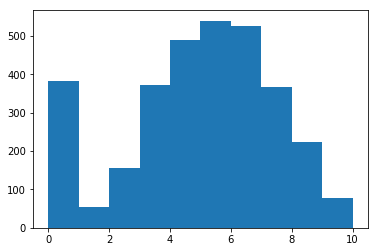

In [7]:
plt.hist(df['critics_vote'])

(array([ 1590.,     0.,     0.,     0.,     0.,   784.,     0.,     0.,
            0.,   811.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

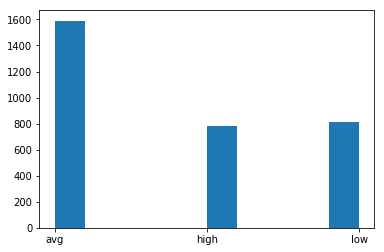

In [14]:
plt.hist(pd.qcut(df['budget'], q=[0, .25, .75, 1], labels=['low', 'avg', 'high']))